## Final Project Submission

Please fill out:
* Student name: James Wainaina
* Student pace: full time
* Scheduled project review date/time: 12/03/2023
* Instructor name: William Okomba
* Blog post URL: 

In [1]:


import pandas as pd #importing data analysis library
import numpy as np #importing scientific computation library
import os #importing module so we can interface with our computer and pull file paths
import matplotlib.pyplot as plt #importing basic plotting library
%matplotlib inline
import seaborn as sns #importing advanced plotting library
from glob import glob #importing module to generate pathnames
import sqlite3 # importing SQL



In [2]:
csv_files = glob('./zippedData/*.csv.gz')
tsv_files = glob('./zippedData/*.tsv.gz')
files = csv_files + tsv_files
type(files)


list

In [3]:


#clean file name
#create dictionary of dataframes of each csv and tsv
files_dict = {}
for filename in files:
    if 'csv' in str(os.path.basename(filename)):
        filename_cleaned = os.path.basename(filename).replace(".csv.gz", "")\
        .replace(".", "_")
        filename_df = pd.read_csv(filename, compression='gzip', index_col=0)
        files_dict[filename_cleaned] = filename_df
    else:
        filename_cleaned = os.path.basename(filename).replace(".tsv.gz", "")\
        .replace(".", "_")
        filename_df = pd.read_csv\
        (filename, compression='gzip', delimiter ='\t', index_col=0, encoding ='ISO-8859-1')
        files_dict[filename_cleaned] = filename_df



In [4]:
print(files)

['./zippedData/tmdb.movies.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/rt.movie_info.tsv.gz', './zippedData/rt.reviews.tsv.gz']


In [5]:
files_dict.keys()

dict_keys(['tmdb_movies', 'tn_movie_budgets', 'bom_movie_gross', 'rt_movie_info', 'rt_reviews'])

In [6]:
files_dict['tmdb_movies'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [7]:
#check key in the dictionary to ensure that dataframes have been created 
files_dict['rt_movie_info'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [8]:
conn = sqlite3.connect("movies_db.sqlite")

In [9]:
#create function to create a SQL table passing a dataframe, name, and 
#connection to database
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    except Exception as e:
        print(f"could not make table {name}")
        print(e)



In [10]:


#pass the function through a for loop of the tables and names in our 
#dictionary of csv files
for name, table in files_dict.items():
    create_sql_table_from_df(table, name, conn)



could not make table tmdb_movies
Table 'tmdb_movies' already exists.
could not make table tn_movie_budgets
Table 'tn_movie_budgets' already exists.
could not make table bom_movie_gross
Table 'bom_movie_gross' already exists.
could not make table rt_movie_info
Table 'rt_movie_info' already exists.
could not make table rt_reviews
Table 'rt_reviews' already exists.


In [11]:
#create a cursor to do a query of our sql db
cur = conn.cursor()

In [12]:
#testing connection on our database of tables
conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[('tmdb_movies',),
 ('tn_movie_budgets',),
 ('bom_movie_gross',),
 ('rt_movie_info',),
 ('rt_reviews',),
 ('budgets_release_dates',),
 ('top_10_studios',)]

## Exploratory Data Analysis

## Which season is the most profitable for movies?

In [13]:
#create a dataframe from the movie budgets file
budgets_and_release_dates_df = files_dict['tn_movie_budgets']

In [14]:
#Check out the columns
budgets_and_release_dates_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
#review the data types
budgets_and_release_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [16]:
#change datatype of release date to a datetime object to extract the month
budgets_and_release_dates_df['release_date'] = pd.to_datetime\
                                     (budgets_and_release_dates_df['release_date'])

In [17]:


#change datatype of the budget and gross columns to int64
budgets_and_release_dates_df[budgets_and_release_dates_df.columns[2:]] \
        = budgets_and_release_dates_df[budgets_and_release_dates_df.columns[2:]]\
        .apply(lambda x: x.str.replace('$',''))\
        .apply(lambda x: x.str.replace(',','')).astype(np.int64)



In [18]:


#create profit column subtracting budget from worldwide gross
budgets_and_release_dates_df['movie_profit'] \
        = budgets_and_release_dates_df['worldwide_gross']\
        - budgets_and_release_dates_df['production_budget']



In [19]:
#check out the data and confirm datatype changes
budgets_and_release_dates_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [20]:
#create month column so we can plot it against profit
budgets_and_release_dates_df['release_month'] = \
        pd.DatetimeIndex(budgets_and_release_dates_df['release_date']).month

In [21]:
#check to ensure no duplicate rows
duplicate_budgets_and_release_dates_df = \
        budgets_and_release_dates_df[budgets_and_release_dates_df.duplicated()]

In [22]:
#review dataframe of duplicate rows
duplicate_budgets_and_release_dates_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,release_month
id,,,,,,,


In [23]:
#check to ensure release month column was inserted correctly
budgets_and_release_dates_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,release_month
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,6
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12


In [24]:
#check for earliest value in our datetime column
budgets_and_release_dates_df['release_date'].min()

Timestamp('1915-02-08 00:00:00')

In [25]:
#check for number of entries
budgets_and_release_dates_df.shape

(5782, 7)

## Date Review

In [26]:
#create SQL table to run a query of our data (not run in this instance since 
#table had been created in prior kernel and produces an error message)
#budgets_and_release_dates_df.to_sql('budgets_release_dates', conn)

In [27]:
cur.execute("""SELECT movie_profit, release_month
            FROM budgets_release_dates
            WHERE release_date > 2000-01-01
            ORDER BY movie_profit DESC;""").fetchall()


[(2351345279, 12),
 (2008208395, 12),
 (1748134200, 4),
 (1747311220, 12),
 (1433854864, 6),
 (1328722794, 4),
 (1292935897, 5),
 (1216693157, 7),
 (1148258224, 2),
 (1135772799, 6),
 (1122469910, 11),
 (1099199706, 3),
 (1086336173, 7),
 (1072413963, 5),
 (1047403341, 12),
 (1042520711, 6),
 (1015392272, 5),
 (999721747, 12),
 (986894640, 12),
 (984846267, 4),
 (975812584, 6),
 (959727750, 6),
 (948061550, 3),
 (928790543, 6),
 (912044677, 5),
 (910526981, 11),
 (906914868, 6),
 (899216835, 7),
 (894039076, 6),
 (890069413, 5),
 (874496193, 12),
 (869429616, 3),
 (868879522, 6),
 (867008132, 5),
 (850047606, 11),
 (849102856, 12),
 (842429370, 5),
 (841215812, 7),
 (840699645, 12),
 (839985342, 11),
 (835431568, 11),
 (825491110, 3),
 (821215193, 6),
 (816996207, 7),
 (811750534, 7),
 (809439099, 7),
 (793076457, 7),
 (787854547, 4),
 (784765137, 7),
 (782465326, 6),
 (779225135, 11),
 (778210985, 12),
 (775598007, 5),
 (769701857, 7),
 (767003568, 12),
 (747099794, 11),
 (743025593, 

In [28]:
budgets_and_release_dates_df.groupby('release_month').mean()

,production_budget,domestic_gross,worldwide_gross,movie_profit
release_month,,,,
1,2.084349e+07,2.394962e+07,4.656382e+07,2.572033e+07
2,2.804642e+07,3.541465e+07,7.154453e+07,4.349811e+07
3,3.078208e+07,3.857299e+07,8.063337e+07,4.985129e+07
4,2.380283e+07,2.732840e+07,5.992026e+07,3.611743e+07
5,4.713520e+07,6.669795e+07,1.622680e+08,1.151328e+08
6,4.309912e+07,6.582791e+07,1.425230e+08,9.942391e+07
7,4.254616e+07,6.072804e+07,1.409636e+08,9.841746e+07
8,2.555609e+07,3.216821e+07,6.097841e+07,3.542232e+07
9,2.181290e+07,2.314989e+07,4.669369e+07,2.488078e+07


In [29]:
#run an SQL query for movie profit by month
cur.execute("""SELECT avg(movie_profit), release_month
            FROM budgets_release_dates
            GROUP BY release_month
            ORDER BY avg(movie_profit) DESC;""").fetchall()

[(115132808.4004914, 5),
 (99423910.9519833, 6),
 (98417458.35909091, 7),
 (93141569.2510288, 11),
 (68441565.30604027, 12),
 (49851292.36170213, 3),
 (43498106.821428575, 2),
 (36117428.171806164, 4),
 (35422316.85685484, 8),
 (29071903.781849913, 10),
 (25720334.109510086, 1),
 (24880784.866125762, 9)]

## Data Visualization

/home/james/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


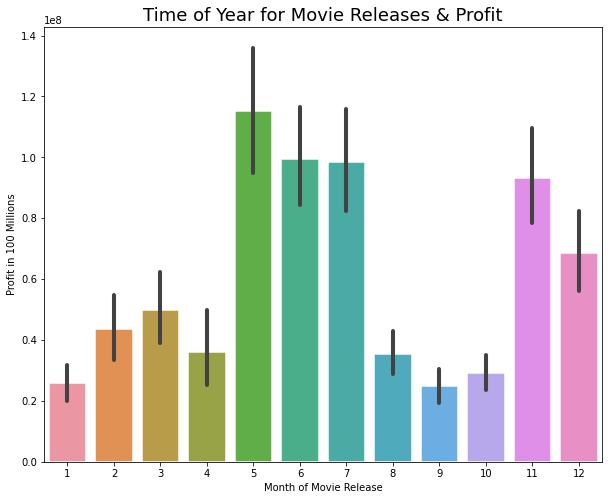

In [30]:
#create a boxplot using release month and profit
x = budgets_and_release_dates_df['release_month']
y = budgets_and_release_dates_df['movie_profit']
f, ax = plt.subplots(figsize=(10,8))
sns.set_style('whitegrid')
sns.set_context('talk') 
sns.barplot(x, y)
plt.title('Time of Year for Movie Releases & Profit')
plt.ylabel('Profit in 100 Millions')
plt.xlabel('Month of Movie Release') 
plt.show()

## Findings
The dual seasonality of larger earnings throughout the summer and at the end of the year is evident from our boxplot. The summer months of June and November leading up to the winter months are when the largest profits may be made.


## Recommendation
Microsoft should consider the seasonality of earnings and choose films that will be released in May or June to increase the probability that they will be a success.

## Leading movie studios and there budgets
To determine which source offers the largest data set on studio information, we will compare the Box Office Magic, Rotten Tomatoes, and our current dataframe from the previous question. We want to evaluate the production budgets of various studios and find out which ones are releasing the most films.

## Studios and Budgets

In [31]:
#check out our dataframe from the earlier DF with budget data
budgets_and_release_dates_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,release_month
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,6
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12


In [32]:
#create our df from the unzipped .csv file
rt_studios_df = files_dict['rt_movie_info']

In [33]:
#check the value counts for studios in this dataframe
rt_studios_df['studio'].value_counts()

Universal Pictures        35
Paramount Pictures        27
20th Century Fox          26
Sony Pictures Classics    22
Warner Bros. Pictures     21
                          ..
Independant Pictures       1
Film Sales Company         1
Variance Films             1
A24 and DIRECTV            1
Criterion Collection       1
Name: studio, Length: 200, dtype: int64

In [34]:
##the above dataset looks too short to use 
##create our df from the unzipped .csv file to see if this is a more complete dataset
bom_studios_df = files_dict['bom_movie_gross']

In [35]:
#review the columns in our dataframe
bom_studios_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [36]:
bom_studios_df.reset_index(inplace = True)

In [37]:
bom_studios_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [38]:
#check out the duplicate rows
duplicate_bom_studios_df = bom_studios_df[bom_studios_df.duplicated()]

In [39]:
#identify that there are duplicates to remove
duplicate_bom_studios_df

,title,studio,domestic_gross,foreign_gross,year


In [40]:
#drop duplicate rows
bom_studios_df = bom_studios_df.drop_duplicates()

In [41]:
#confirm the duplicate rows have been dropped
duplicate_bom_studios_df = bom_studios_df[bom_studios_df.duplicated()]
duplicate_bom_studios_df

,title,studio,domestic_gross,foreign_gross,year


In [42]:
#pull the value counts for each studio
bom_studios_df['studio'].value_counts()

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
        ... 
Argo.      1
TAFC       1
DLA        1
PalT       1
Arth.      1
Name: studio, Length: 257, dtype: int64

## Data Review

In [43]:
#check how far back our studio data goes
bom_studios_df['year'].min()

2010

In [44]:
#check how recent our studio data is
bom_studios_df['year'].max()

2018

In [45]:
bom_studios_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.8+ KB


In [46]:
#set the columns as studios and value counts in a new df 
#so we can pull top studio
top_studios_df = bom_studios_df['studio'].value_counts().reset_index()
top_studios_df.columns = ['studio', 'count']

In [47]:
#limit to only studios that have released over a hundred films in the last decade
top_studios_df = top_studios_df[top_studios_df['count'] >= 100]

In [48]:
bom_studios_df.reset_index(inplace = True)

In [49]:
bom_studios_df.index

RangeIndex(start=0, stop=3387, step=1)

In [50]:
#merge our existing budgets and release dates df with our BOM studios list on movie name
studio_budget_details_df = pd.merge(bom_studios_df,\
                                    budgets_and_release_dates_df,\
                                    left_on='title', right_on='movie',\
                                    how = 'inner')


In [51]:
#view our df
studio_budget_details_df

,index,title,studio,domestic_gross_x,foreign_gross,year,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,movie_profit,release_month
0,0,Toy Story 3,BV,415000000.0,652000000,2010,2010-06-18,Toy Story 3,200000000,415004880,1068879522,868879522,6
1,3,Inception,WB,292600000.0,535700000,2010,2010-07-16,Inception,160000000,292576195,835524642,675524642,7
2,4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,5
3,5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,2010-06-30,The Twilight Saga: Eclipse,68000000,300531751,706102828,638102828,6
4,6,Iron Man 2,Par.,312400000.0,311500000,2010,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,3253,Gotti,VE,4300000.0,NaN,2018,2018-06-15,Gotti,10000000,4286367,6089100,-3910900,6
1243,3259,Ben is Back,RAtt.,3700000.0,NaN,2018,2018-12-07,Ben is Back,13000000,3703182,9633111,-3366889,12
1244,3271,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,2018-02-02,Bilal: A New Breed of Hero,30000000,490973,648599,-29351401,2
1245,3279,Mandy,RLJ,1200000.0,NaN,2018,2018-09-14,Mandy,6000000,1214525,1427656,-4572344,9


In [52]:
#create grouped df with only our studio and 
##year with the sum of production budget by year
studio_budget_year_df = studio_budget_details_df.groupby(['studio', 'year'],\
                        as_index = False)['production_budget'].sum()

In [53]:
#view this new df
studio_budget_year_df.head()

,studio,year,production_budget
0,3D,2010,5000000
1,A24,2013,7500000
2,A24,2014,34500000
3,A24,2015,36000000
4,A24,2016,15000000


## Data Visualization

/home/james/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


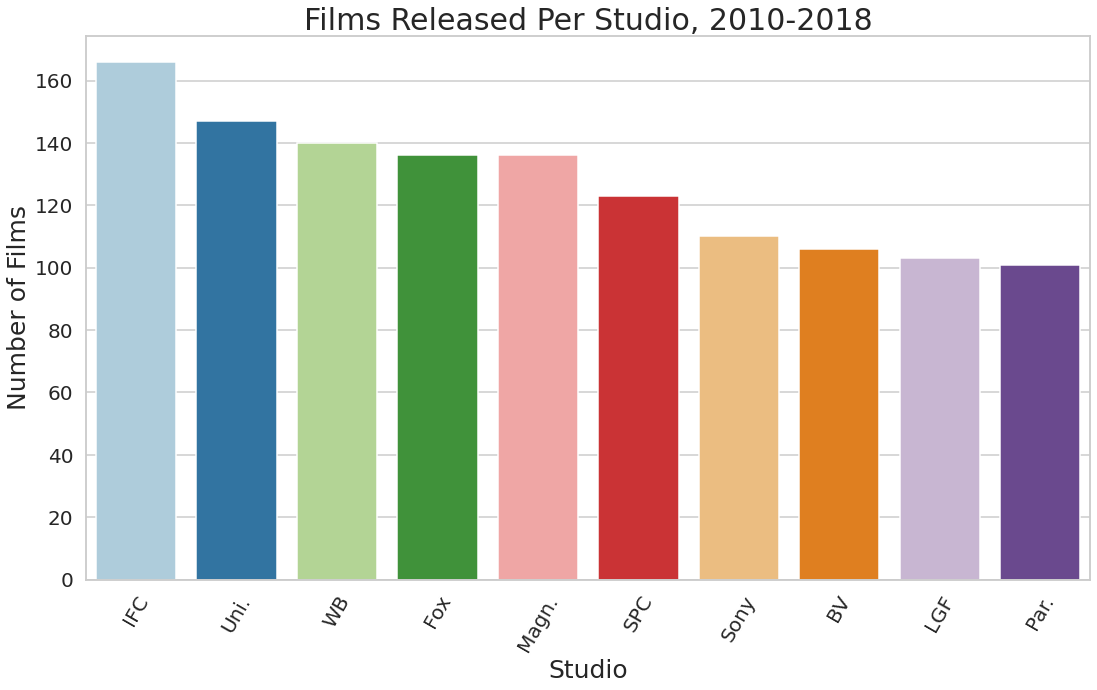

In [54]:
#create our first visualization of the prior-made top studios df that
#doesn't contain budget information, only studios with 100+ films in the past decade
studios_x = top_studios_df['studio']
studios_y = top_studios_df['count']
f, ax = plt.subplots(figsize=(18,10))
sns.set_style('darkgrid')
sns.set_context('talk') 
sns.barplot(studios_x, studios_y, palette='Paired')
plt.title('Films Released Per Studio, 2010-2018', fontsize=30)
plt.xticks(rotation=60, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Number of Films', fontsize = 25)
plt.xlabel('Studio', fontsize = 25) 
plt.show()

In [55]:
#view most films released in the past 10 years df to confirm # of rows
top_studios_df

,studio,count
0,IFC,166
1,Uni.,147
2,WB,140
3,Fox,136
4,Magn.,136
5,SPC,123
6,Sony,110
7,BV,106
8,LGF,103
9,Par.,101


In [56]:
#create list of studios column
studio_list = top_studios_df['studio'].tolist()

In [57]:
#view list
studio_list

['IFC', 'Uni.', 'WB', 'Fox', 'Magn.', 'SPC', 'Sony', 'BV', 'LGF', 'Par.']

In [58]:
#pull list of studios in our df with budgets for studios by year
studio_budget_year_df.studio.unique()

array(['3D', 'A24', 'ALP', 'ATO', 'Affirm', 'Alc', 'Amazon', 'Anch.',
       'Annapurna', 'App.', 'BBC', 'BG', 'BH Tilt', 'BSC', 'BST', 'BV',
       'CBS', 'CE', 'CJ', 'Cleopatra', 'Cohen', 'DR', 'Drft.', 'EC',
       'ELS', 'ENTMP', 'EOne', 'Eros', 'FCW', 'FD', 'First', 'Focus',
       'Fox', 'FoxS', 'Free', 'GK', 'Global Road', 'Gold.', 'GrtIndia',
       'IFC', 'IM', 'IVP', 'IW', 'Jan.', 'KE', 'Kino', 'LD', 'LG/S',
       'LGF', 'LGP', 'MBox', 'MGM', 'MNE', 'Magn.', 'Mira.', 'Mont.',
       'NFC', 'NM', 'Neon', 'OMNI/FSR', 'ORF', 'Orch.', 'Osci.', 'Over.',
       'P/DW', 'P4', 'PFR', 'PH', 'PNT', 'Par.', 'ParV', 'RAtt.', 'RLJ',
       'RTWC', 'Rela.', 'Relbig.', 'SGem', 'SMod', 'SPC', 'STX', 'Saban',
       'Scre.', 'Sony', 'Strand', 'Studio 8', 'Sum.', 'TFA', 'TriS',
       'Trib.', 'UTV', 'Uni.', 'VE', 'Viv.', 'W/Dim.', 'WB', 'WB (NL)',
       'WHE', 'Wein.', 'Yash'], dtype=object)

In [59]:
#trim down df to only those in our list of 10 studios
top_10_studios_df = studio_budget_year_df[studio_budget_year_df['studio']\
                                          .isin(studio_list)]


In [60]:
top_10_studios_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 30 to 278
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   studio             84 non-null     object
 1   year               84 non-null     int64 
 2   production_budget  84 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [61]:
#confirm unique names of studios 
top_10_studios_df.studio.unique()

array(['BV', 'Fox', 'IFC', 'LGF', 'Magn.', 'Par.', 'SPC', 'Sony', 'Uni.',
       'WB'], dtype=object)

In [62]:
#create SQL table of our studio/production budget df
#(not run in this instance since table had been created in prior kernel and produces an error message)
#top_10_studios_df.to_sql('top_10_studios', conn)

In [63]:
#run SQL query for average production budget in release year by studio
cur.execute("""SELECT studio,
            AVG(production_budget) AS avg_yrly_budget
            FROM top_10_studios
            GROUP BY studio
            ORDER BY avg_yrly_budget DESC;""")
yrly_budget_df = pd.DataFrame(cur.fetchall())
yrly_budget_df.columns = [i[0] for i in cur.description]
yrly_budget_df

,studio,avg_yrly_budget
0,BV,1.050089e+09
1,WB,9.108556e+08
2,Fox,8.617222e+08
3,Uni.,7.330778e+08
4,Sony,5.611667e+08
5,Par.,5.300000e+08
6,LGF,2.299320e+08
7,SPC,4.437000e+07
8,IFC,3.875250e+07
9,Magn.,2.522000e+07


In [64]:
#group by studios so we can create subplot of production budgets for each studio
grouped_studios_df = top_10_studios_df.groupby('studio')

In [65]:
#confirm the change
grouped_studios_df.head()


,studio,year,production_budget
30,BV,2010,775000000
31,BV,2011,1084600000
32,BV,2012,785000000
33,BV,2013,1058000000
34,BV,2014,937200000
77,Fox,2010,757500000
78,Fox,2011,702000000
79,Fox,2012,746500000
80,Fox,2013,1048000000
81,Fox,2014,1313000000


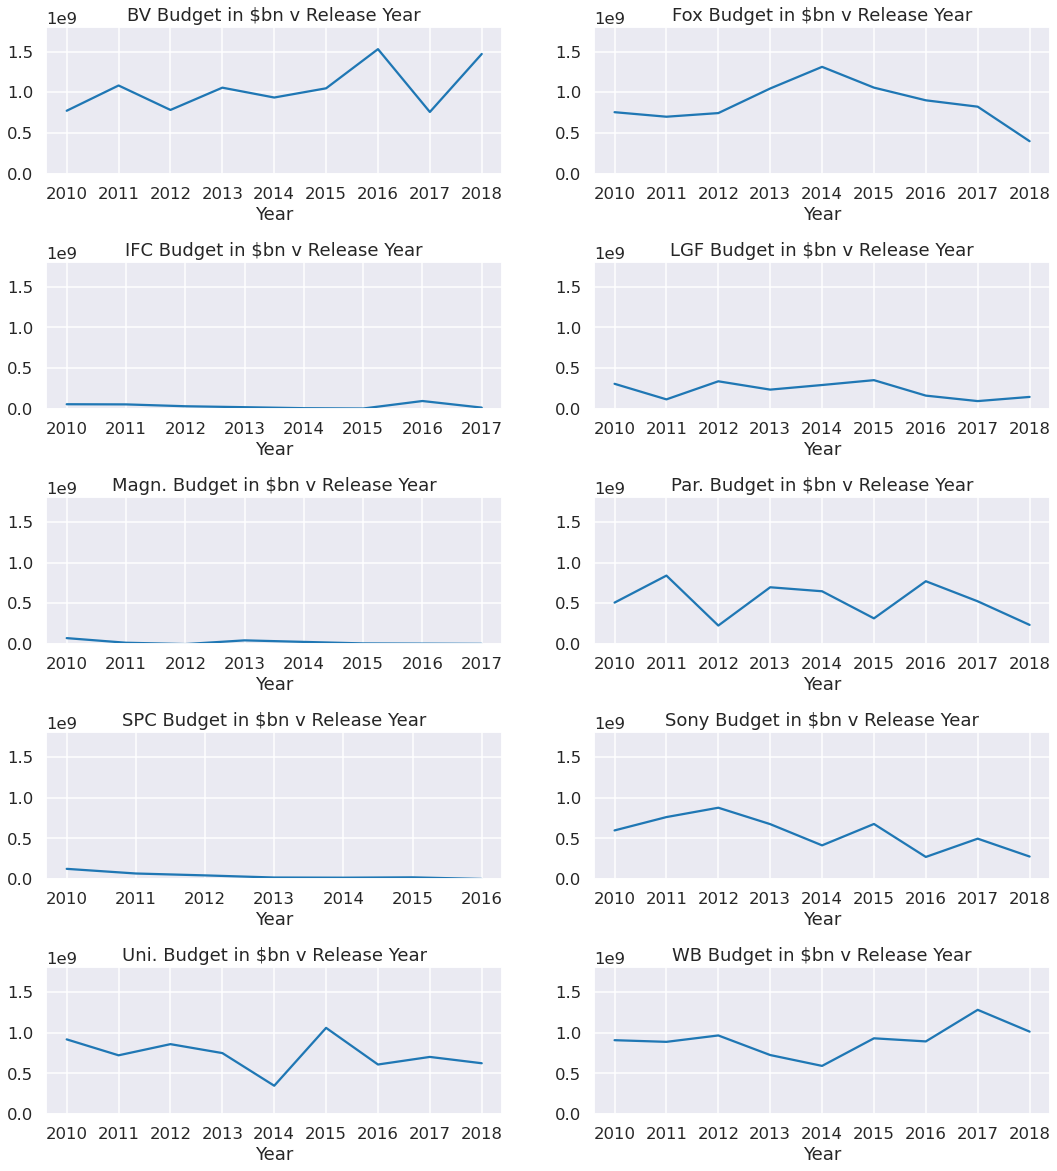

In [66]:
#create a 5x2 grid of subplots using for loops and enumerate to create individual
#axes passing the index into the 3rd tuple value of the subplot which 
#determines the number of each axis. 
plt.figure(figsize=(18,20))
for index, (studio, production_budget) in enumerate(grouped_studios_df):
    ax = plt.subplot(5, 2, index+1)
    production_budget.plot(x='year', y='production_budget', ax=ax, legend=False)
    ax.set_title(studio + ' Budget in $bn v Release Year', loc='center')
    ax.set_xlabel('Year')
    ax.set_ylim(0, 1800000000)
plt.subplots_adjust(hspace = .6)

## Findings
As is often assumed, the major studios that purchase and distribute films—Warner Bros., Universal, Paramount, Fox, and BV—have yearly production budgets of about $1 billion, compared to smaller independent distributors like Sony Pictures Classic, Magnolia Studios, and IFC.

## Recommendations
Microsoft should think about the possibility of using its name in connection with movie acquisition and distribution as opposed to original development. It would be a good idea for a model to enter the business given that these lesser budget films yet made it to the top 10 along with the major feature.

## Conclusion
1. Even though there are many popular genres in foreign language movies, we advise picking Drama or Comedy if your company decides to produce or distribute a foreign language movie.
2. We advise joining the movie business through an acquisition/distribution approach since more successful movies may be made for less money than original films, which is what large studios do.
3. Planning for movie releases in the late spring or early fall is something I would advise. It is significant to note that June saw enormous gains and equally enormous losses.